In [67]:
from bs4 import BeautifulSoup
import requests

In [68]:
import re

### Making soup from text file

In [69]:
def soup_maker(url):
    headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text)
    return(soup)

### Scrapping movies actors starred in

In [70]:
def get_movies_by_actor_soup(actor_soup, film_limit=None):
    film_table = actor_soup.find_all(attrs = {'class': ['filmo-row odd', 'filmo-row even'], 'id': lambda x: 
                                    x and x.startswith('actor') or x.startswith('actress')})
    film_table_prepared = []
    for film in film_table:
        if film.find('b').nextSibling == '\n':
            film_table_prepared.append(film)
    film_redone = []
    for elem in film_table_prepared:
        film_redone.append(elem.find('a'))
    film_final = []
    for elem in film_redone:
        film_final.append((elem.get_text().strip(),'https://www.imdb.com' + elem.attrs["href"].split('?')[0] + 
                           'fullcredits/'))
        if len(film_final) == film_limit:
            break
    return(film_final)

### Vice versa

In [71]:
def get_actors_by_movie_soup(cast_soup, actors_limit=None):
    cast_table = cast_soup.find(class_ = 'cast_list')
    cast_table_prepared = cast_table.find_all(href = re.compile('name'))
    cast_table_prepared = cast_table_prepared[1::2]
    cast_redone = []
    for elem in cast_table_prepared:
        cast_redone.append((elem.get_text().strip(),'https://www.imdb.com' + elem.attrs["href"].split('?')[0] + 
                            'fullcredits/'))
        if len(cast_redone) == actors_limit:
            break
    return(cast_redone)

In [72]:
#examples
dwayne_soup = soup_maker('https://www.imdb.com/name/nm0425005/fullcredits')
scarlett_soup = soup_maker('https://www.imdb.com/name/nm0424060/fullcredits')

In [73]:
get_movies_by_actor_soup(dwayne_soup)

[('Форсаж 10', 'https://www.imdb.com/title/tt5433140/fullcredits/'),
 ('Чёрный Адам', 'https://www.imdb.com/title/tt6443346/fullcredits/'),
 ('Суперпитомцы', 'https://www.imdb.com/title/tt8912936/fullcredits/'),
 ('Красное уведомление', 'https://www.imdb.com/title/tt7991608/fullcredits/'),
 ('Главный герой', 'https://www.imdb.com/title/tt6264654/fullcredits/'),
 ('Круиз по джунглям', 'https://www.imdb.com/title/tt0870154/fullcredits/'),
 ('Джуманджи: Новый уровень',
  'https://www.imdb.com/title/tt7975244/fullcredits/'),
 ('Форсаж: Хоббс и Шоу', 'https://www.imdb.com/title/tt6806448/fullcredits/'),
 ('Борьба с моей семьей', 'https://www.imdb.com/title/tt6513120/fullcredits/'),
 ('Небоскрёб', 'https://www.imdb.com/title/tt5758778/fullcredits/'),
 ('Рэмпейдж', 'https://www.imdb.com/title/tt2231461/fullcredits/'),
 ('Джуманджи: Зов джунглей',
  'https://www.imdb.com/title/tt2283362/fullcredits/'),
 ('Спасатели Малибу', 'https://www.imdb.com/title/tt1469304/fullcredits/'),
 ('Форсаж 8', 'h

In [74]:
get_movies_by_actor_soup(dwayne_soup, film_limit = 5)

[('Форсаж 10', 'https://www.imdb.com/title/tt5433140/fullcredits/'),
 ('Чёрный Адам', 'https://www.imdb.com/title/tt6443346/fullcredits/'),
 ('Суперпитомцы', 'https://www.imdb.com/title/tt8912936/fullcredits/'),
 ('Красное уведомление', 'https://www.imdb.com/title/tt7991608/fullcredits/'),
 ('Главный герой', 'https://www.imdb.com/title/tt6264654/fullcredits/')]

In [75]:
get_movies_by_actor_soup(dwayne_soup, film_limit = 100)

[('Форсаж 10', 'https://www.imdb.com/title/tt5433140/fullcredits/'),
 ('Чёрный Адам', 'https://www.imdb.com/title/tt6443346/fullcredits/'),
 ('Суперпитомцы', 'https://www.imdb.com/title/tt8912936/fullcredits/'),
 ('Красное уведомление', 'https://www.imdb.com/title/tt7991608/fullcredits/'),
 ('Главный герой', 'https://www.imdb.com/title/tt6264654/fullcredits/'),
 ('Круиз по джунглям', 'https://www.imdb.com/title/tt0870154/fullcredits/'),
 ('Джуманджи: Новый уровень',
  'https://www.imdb.com/title/tt7975244/fullcredits/'),
 ('Форсаж: Хоббс и Шоу', 'https://www.imdb.com/title/tt6806448/fullcredits/'),
 ('Борьба с моей семьей', 'https://www.imdb.com/title/tt6513120/fullcredits/'),
 ('Небоскрёб', 'https://www.imdb.com/title/tt5758778/fullcredits/'),
 ('Рэмпейдж', 'https://www.imdb.com/title/tt2231461/fullcredits/'),
 ('Джуманджи: Зов джунглей',
  'https://www.imdb.com/title/tt2283362/fullcredits/'),
 ('Спасатели Малибу', 'https://www.imdb.com/title/tt1469304/fullcredits/'),
 ('Форсаж 8', 'h

In [76]:
get_movies_by_actor_soup(scarlett_soup)

[('North Star', 'https://www.imdb.com/title/tt20911974/fullcredits/'),
 ('Город астероидов', 'https://www.imdb.com/title/tt14230388/fullcredits/'),
 ('Зверопой 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'),
 ('Чёрная Вдова', 'https://www.imdb.com/title/tt3480822/fullcredits/'),
 ('Кролик Джоджо', 'https://www.imdb.com/title/tt2584384/fullcredits/'),
 ('История о супружестве',
  'https://www.imdb.com/title/tt7653254/fullcredits/'),
 ('Мстители: Финал', 'https://www.imdb.com/title/tt4154796/fullcredits/'),
 ('Капитан Марвел', 'https://www.imdb.com/title/tt4154664/fullcredits/'),
 ('Мстители: Война бесконечности',
  'https://www.imdb.com/title/tt4154756/fullcredits/'),
 ('Остров собак', 'https://www.imdb.com/title/tt5104604/fullcredits/'),
 ('Очень плохие девчонки',
  'https://www.imdb.com/title/tt4799050/fullcredits/'),
 ('Призрак в доспехах', 'https://www.imdb.com/title/tt1219827/fullcredits/'),
 ('Зверопой', 'https://www.imdb.com/title/tt3470600/fullcredits/'),
 ('Первый мст

In [77]:
get_movies_by_actor_soup(scarlett_soup, film_limit = 5)

[('North Star', 'https://www.imdb.com/title/tt20911974/fullcredits/'),
 ('Город астероидов', 'https://www.imdb.com/title/tt14230388/fullcredits/'),
 ('Зверопой 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'),
 ('Чёрная Вдова', 'https://www.imdb.com/title/tt3480822/fullcredits/'),
 ('Кролик Джоджо', 'https://www.imdb.com/title/tt2584384/fullcredits/')]

In [78]:
get_movies_by_actor_soup(scarlett_soup, film_limit = 100)

[('North Star', 'https://www.imdb.com/title/tt20911974/fullcredits/'),
 ('Город астероидов', 'https://www.imdb.com/title/tt14230388/fullcredits/'),
 ('Зверопой 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'),
 ('Чёрная Вдова', 'https://www.imdb.com/title/tt3480822/fullcredits/'),
 ('Кролик Джоджо', 'https://www.imdb.com/title/tt2584384/fullcredits/'),
 ('История о супружестве',
  'https://www.imdb.com/title/tt7653254/fullcredits/'),
 ('Мстители: Финал', 'https://www.imdb.com/title/tt4154796/fullcredits/'),
 ('Капитан Марвел', 'https://www.imdb.com/title/tt4154664/fullcredits/'),
 ('Мстители: Война бесконечности',
  'https://www.imdb.com/title/tt4154756/fullcredits/'),
 ('Остров собак', 'https://www.imdb.com/title/tt5104604/fullcredits/'),
 ('Очень плохие девчонки',
  'https://www.imdb.com/title/tt4799050/fullcredits/'),
 ('Призрак в доспехах', 'https://www.imdb.com/title/tt1219827/fullcredits/'),
 ('Зверопой', 'https://www.imdb.com/title/tt3470600/fullcredits/'),
 ('Первый мст

In [79]:
len(get_movies_by_actor_soup(dwayne_soup))

46

In [80]:
len(get_movies_by_actor_soup(scarlett_soup))

56

In [81]:
black_window_soup = soup_maker('https://www.imdb.com/title/tt3480822/fullcredits/')

In [82]:
get_actors_by_movie_soup(black_window_soup, actors_limit=None)

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'),
 ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'),
 ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'),
 ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'),
 ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/'),
 ('Ever Anderson', 'https://www.imdb.com/name/nm8349839/fullcredits/'),
 ('Violet McGraw', 'https://www.imdb.com/name/nm8627157/fullcredits/'),
 ('O-T Fagbenle', 'https://www.imdb.com/name/nm1282966/fullcredits/'),
 ('William Hurt', 'https://www.imdb.com/name/nm0000458/fullcredits/'),
 ('Olga Kurylenko', 'https://www.imdb.com/name/nm1385871/fullcredits/'),
 ('Ryan Kiera Armstrong', 'https://www.imdb.com/name/nm8740834/fullcredits/'),
 ('Liani Samuel', 'https://www.imdb.com/name/nm9384191/fullcredits/'),
 ('Michelle Lee', 'https://www.imdb.com/name/nm1685477/fullcredits/'),
 ('Lewis Young', 'https://www.imdb.com/name/nm4447854/ful

In [83]:
get_actors_by_movie_soup(black_window_soup, actors_limit=150)

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'),
 ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'),
 ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'),
 ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'),
 ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/'),
 ('Ever Anderson', 'https://www.imdb.com/name/nm8349839/fullcredits/'),
 ('Violet McGraw', 'https://www.imdb.com/name/nm8627157/fullcredits/'),
 ('O-T Fagbenle', 'https://www.imdb.com/name/nm1282966/fullcredits/'),
 ('William Hurt', 'https://www.imdb.com/name/nm0000458/fullcredits/'),
 ('Olga Kurylenko', 'https://www.imdb.com/name/nm1385871/fullcredits/'),
 ('Ryan Kiera Armstrong', 'https://www.imdb.com/name/nm8740834/fullcredits/'),
 ('Liani Samuel', 'https://www.imdb.com/name/nm9384191/fullcredits/'),
 ('Michelle Lee', 'https://www.imdb.com/name/nm1685477/fullcredits/'),
 ('Lewis Young', 'https://www.imdb.com/name/nm4447854/ful

In [84]:
get_actors_by_movie_soup(black_window_soup, actors_limit=5)

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'),
 ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'),
 ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'),
 ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'),
 ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/')]

### Creating complex function of measuring distance between actors based on films they starred in

In [87]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [97]:
list_of_actor_names = ['Dwayne Johnson', 'Chris Hemsworth', 'Robert Downey Jr.','Akshay Kumar', 'Jackie Chan', 
'Bradley Cooper','Adam Sandler', 'Scarlett Johansson','Chris Evans','Sofia Vergara']

In [98]:
list_of_actor_links = ['https://www.imdb.com/name/nm0425005/fullcredits', 'https://www.imdb.com/name/nm1165110/fullcredits', 
                       'https://www.imdb.com/name/nm0000375/fullcredits', 'https://www.imdb.com/name/nm0474774/fullcredits',
                      'https://www.imdb.com/name/nm0000329/fullcredits', 'https://www.imdb.com/name/nm0177896/fullcredits',
                       'https://www.imdb.com/name/nm0001191/fullcredits', 'https://www.imdb.com/name/nm0424060/fullcredits',
                      'https://www.imdb.com/name/nm0262635/fullcredits', 'https://www.imdb.com/name/nm0005527/fullcredits']

In [99]:
list_zip = zip(list_of_actor_names, list_of_actor_links)
zipped_list = list(list_zip)

In [37]:
naive_dict_actors = {}

In [38]:
naive_dict_movies = {}

In [110]:
def get_movie_distance(actor_start_url, actor_end_url):
    
    current_distance = 1
    films_seen = set()
    actors_checked = set()
    actors_url = [actor_start_url]
 
    while current_distance <= 3: 
        actors_next = []
        for actor_url in actors_url:
            if actor_url in naive_dict_actors.keys():
                movies = naive_dict_actors[actor_url]
            else:
                movies = get_movies_by_actor_soup(soup_maker(actor_url), 5)
                naive_dict_actors[actor_url] = movies
            movies = [m for m in movies if m[1] not in films_seen]
            for m in movies:
                films_seen.add(m[1])
                delay_seconds = randint(1, 3)
                if m[1] in naive_dict_movies.keys():
                    actors = naive_dict_movies[m[1]]
                else:
                    try:
                        actors = get_actors_by_movie_soup(soup_maker(m[1]), 5)
                        naive_dict_movies[m[1]] = actors
                    except:
                        continue
                for actor in actors:
                    if actor[1] == actor_end_url:
                        return current_distance
                    actors_next.append(actor[1])
                      
        current_distance += 1
        actors_checked.update(actors_url)
        actors_url = actors_next            
    return -1
  

In [104]:
list_of_links = ['https://www.imdb.com/name/nm0262635/fullcredits/', 'https://www.imdb.com/name/nm0005527/fullcredits/',
                'https://www.imdb.com/name/nm0424060/fullcredits/', 'https://www.imdb.com/name/nm0001191/fullcredits/',
                'https://www.imdb.com/name/nm0177896/fullcredits/', 'https://www.imdb.com/name/nm0000329/fullcredits/',
                'https://www.imdb.com/name/nm0474774/fullcredits/', 'https://www.imdb.com/name/nm0000375/fullcredits/',
                 'https://www.imdb.com/name/nm1165110/fullcredits/', 'https://www.imdb.com/name/nm0425005/fullcredits/']

In [105]:
import itertools
from random import randint
import time

In [106]:
list_of_combinations = list(itertools.permutations(list_of_links_2, 2))

In [115]:
list_of_distances = []

In [116]:
for combination in list_of_combinations:
    
        print(f'Distance between {combination[0]} and {combination[1]} is:')
        
        am = get_movie_distance(combination[0], combination[1])
    
        list_of_distances.append(am)
        
        print(am)
    

Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0005527/fullcredits/ is:
-1
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0424060/fullcredits/ is:
2
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0001191/fullcredits/ is:
3
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0177896/fullcredits/ is:
3
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0000329/fullcredits/ is:
-1
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0474774/fullcredits/ is:
-1
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm0000375/fullcredits/ is:
2
Distance between https://www.imdb.com/name/nm0262635/fullcredits/ and https://www.imdb.com/name/nm1165110/fullcredits/ is:

In [117]:
final = list(map(list, zip(list_of_combinations,list_of_distances)))

In [118]:
len(final)

90

In [119]:
for elem in final:
    if elem[0][0] == 'https://www.imdb.com/name/nm0262635/fullcredits/':
        elem.append('Chris_Evans')
    if elem[0][0] == 'https://www.imdb.com/name/nm0005527/fullcredits/':
        elem.append('Sofia_Vergara')
    if elem[0][0] == 'https://www.imdb.com/name/nm0424060/fullcredits/':
        elem.append('Scarlett_Johansson')
    if elem[0][0] == 'https://www.imdb.com/name/nm0001191/fullcredits/':
        elem.append('Adam_Sandler')
    if elem[0][0] == 'https://www.imdb.com/name/nm0177896/fullcredits/':
        elem.append('Bradley_Cooper')
    if elem[0][0] == 'https://www.imdb.com/name/nm0000329/fullcredits/':
        elem.append('Jackie_Chan')
    if elem[0][0] == 'https://www.imdb.com/name/nm0474774/fullcredits/':
        elem.append('Akshay Kumar')
    if elem[0][0] == 'https://www.imdb.com/name/nm0000375/fullcredits/':
        elem.append('Robert_Downey_Jr.')
    if elem[0][0] == 'https://www.imdb.com/name/nm1165110/fullcredits/':
        elem.append('Chris_Hemsworth')
    if elem[0][0] == 'https://www.imdb.com/name/nm0425005/fullcredits/':
        elem.append('Dwayne Johnson')
    if elem[0][1] == 'https://www.imdb.com/name/nm0262635/fullcredits/':
        elem.append('Chris_Evans')
    if elem[0][1] == 'https://www.imdb.com/name/nm0005527/fullcredits/':
        elem.append('Sofia_Vergara')
    if elem[0][1] == 'https://www.imdb.com/name/nm0424060/fullcredits/':
        elem.append('Scarlett_Johansson')
    if elem[0][1] == 'https://www.imdb.com/name/nm0001191/fullcredits/':
        elem.append('Adam_Sandler')
    if elem[0][1] == 'https://www.imdb.com/name/nm0177896/fullcredits/':
        elem.append('Bradley_Cooper')
    if elem[0][1] == 'https://www.imdb.com/name/nm0000329/fullcredits/':
        elem.append('Jackie_Chan')
    if elem[0][1] == 'https://www.imdb.com/name/nm0474774/fullcredits/':
        elem.append('Akshay Kumar')
    if elem[0][1] == 'https://www.imdb.com/name/nm0000375/fullcredits/':
        elem.append('Robert_Downey_Jr.')
    if elem[0][1] == 'https://www.imdb.com/name/nm1165110/fullcredits/':
        elem.append('Chris_Hemsworth')
    if elem[0][1] == 'https://www.imdb.com/name/nm0425005/fullcredits/':
        elem.append('Dwayne Johnson')

### Making df from the obtained results

In [121]:
import pandas as pd

In [122]:
df = pd.DataFrame(final, columns = ['Urls', 'Distance', 'Actor_start_name', 'Actor_finish_name']) 

In [123]:
df.to_csv('Distances_final.csv', index=False)

In [143]:
df

,Urls,Distance,Actor_start_name,Actor_finish_name
0,(https://www.imdb.com/name/nm0262635/fullcredi...,-1,Chris_Evans,Sofia_Vergara
1,(https://www.imdb.com/name/nm0262635/fullcredi...,2,Chris_Evans,Scarlett_Johansson
2,(https://www.imdb.com/name/nm0262635/fullcredi...,3,Chris_Evans,Adam_Sandler
3,(https://www.imdb.com/name/nm0262635/fullcredi...,3,Chris_Evans,Bradley_Cooper
4,(https://www.imdb.com/name/nm0262635/fullcredi...,-1,Chris_Evans,Jackie_Chan
...,...,...,...,...
85,(https://www.imdb.com/name/nm0425005/fullcredi...,2,Dwayne Johnson,Bradley_Cooper
86,(https://www.imdb.com/name/nm0425005/fullcredi...,3,Dwayne Johnson,Jackie_Chan
87,(https://www.imdb.com/name/nm0425005/fullcredi...,-1,Dwayne Johnson,Akshay Kumar
88,(https://www.imdb.com/name/nm0425005/fullcredi...,3,Dwayne Johnson,Robert_Downey_Jr.


### Drowing graphs of actors connectedness

In [144]:
import networkx as nx

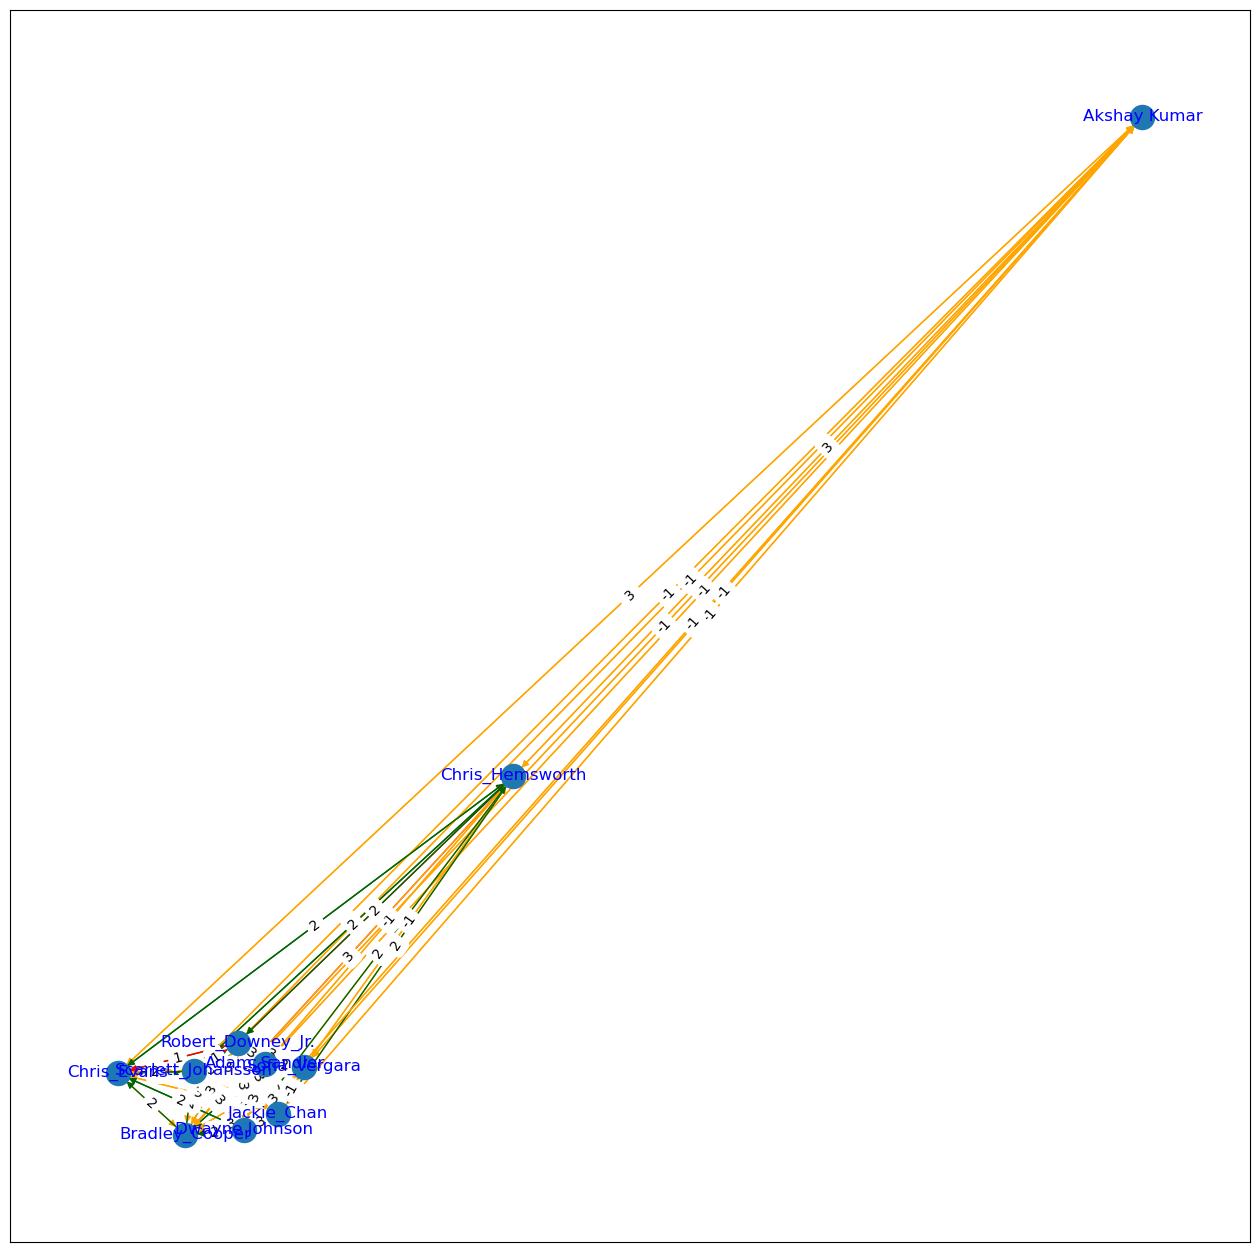

In [158]:
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row['Actor_start_name'], row['Actor_finish_name'], weight = row['Distance'])
edges = G.edges(data=True)
colors = ['red' if data['weight'] == 1 else 'darkgreen' if data['weight'] == 2 else 'orange' for _, _, data in edges]
plt.figure(figsize=(16,16))
pos = nx.spring_layout(G)
lab = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, edge_color = colors, font_color='blue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=lab)
plt.show()

In [159]:
df_1 = df[df['Distance'] == 1]

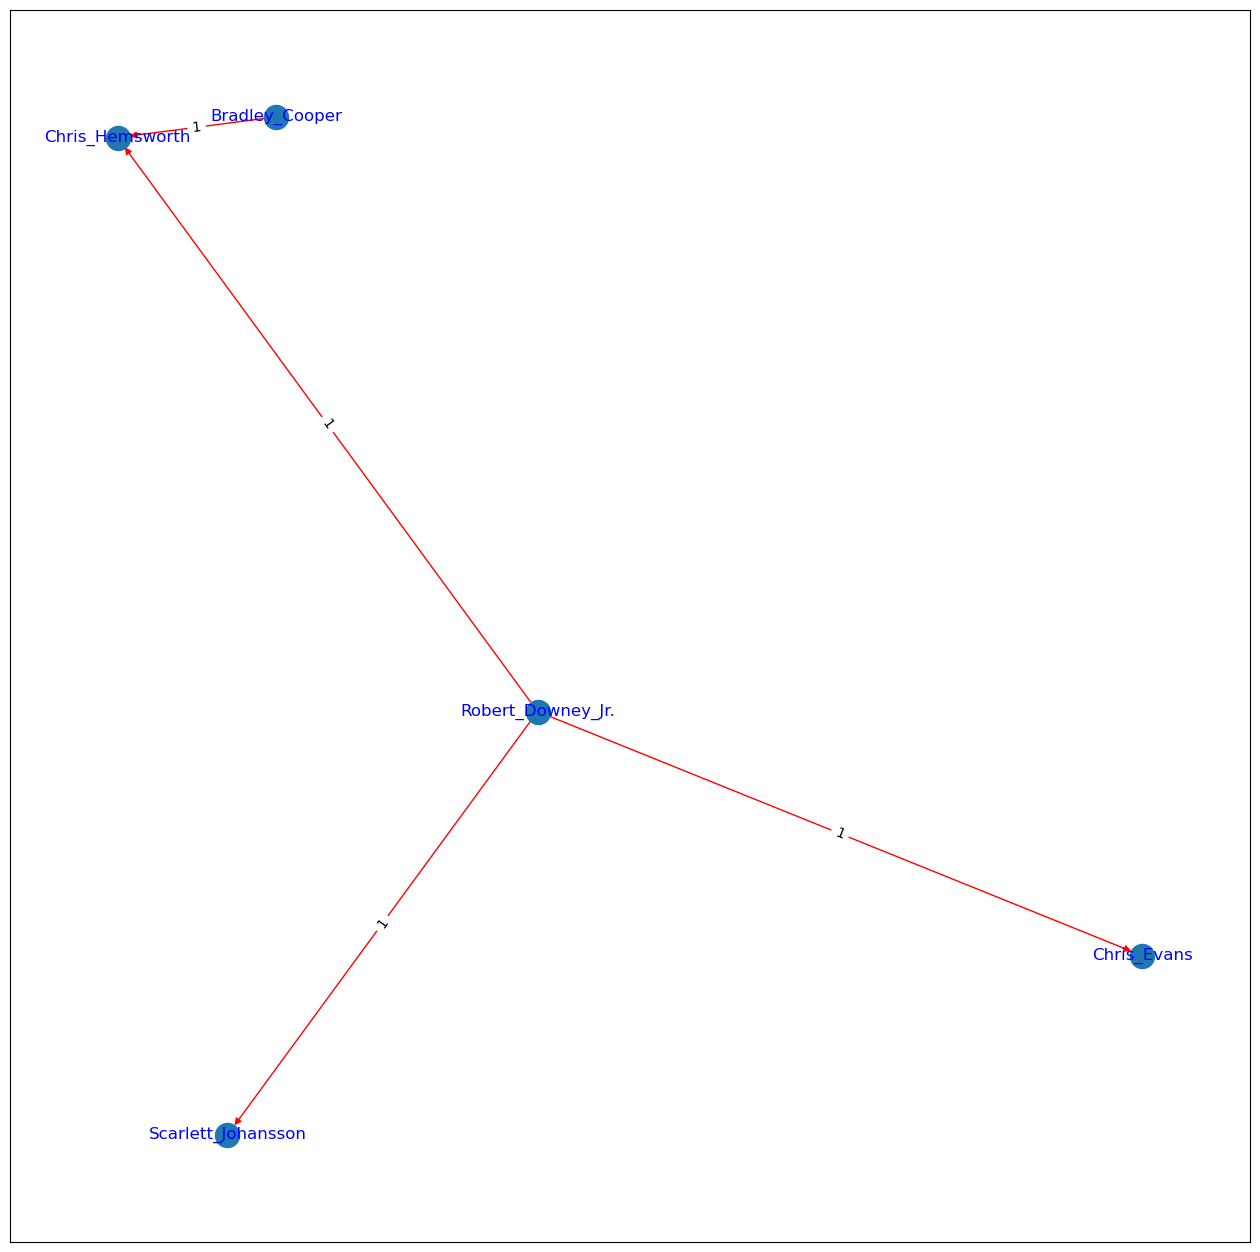

In [160]:
G = nx.DiGraph()
for index, row in df_1.iterrows():
    G.add_edge(row['Actor_start_name'], row['Actor_finish_name'], weight = row['Distance'])
edges = G.edges(data=True)
colors = ['red' if data['weight'] == 1 else 'darkgreen' if data['weight'] == 2 else 'orange' for _, _, data in edges]
plt.figure(figsize=(16,16))
pos = nx.spring_layout(G)
lab = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, edge_color = colors, font_color='blue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=lab)
plt.show()

In [153]:
df_2= df[df['Distance'] == 2]

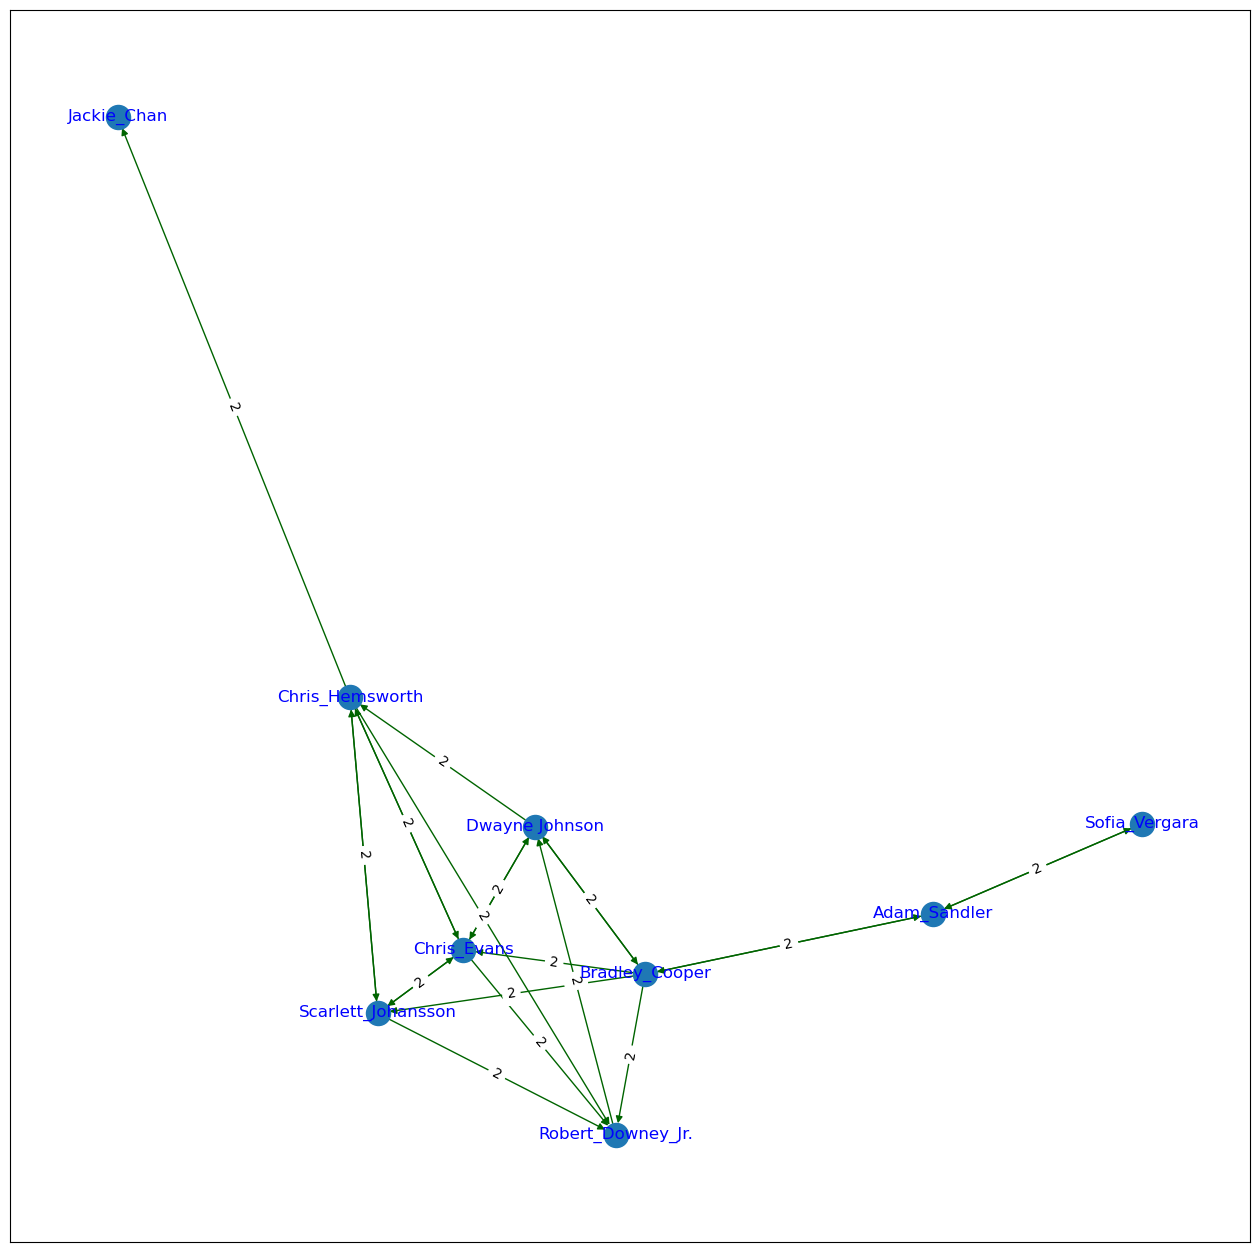

In [161]:
G = nx.DiGraph()
for index, row in df_2.iterrows():
    G.add_edge(row['Actor_start_name'], row['Actor_finish_name'], weight = row['Distance'])
edges = G.edges(data=True)
colors = ['red' if data['weight'] == 1 else 'darkgreen' if data['weight'] == 2 else 'orange' for _, _, data in edges]
plt.figure(figsize=(16,16))
pos = nx.spring_layout(G)
lab = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, edge_color = colors, font_color='blue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=lab)
plt.show()

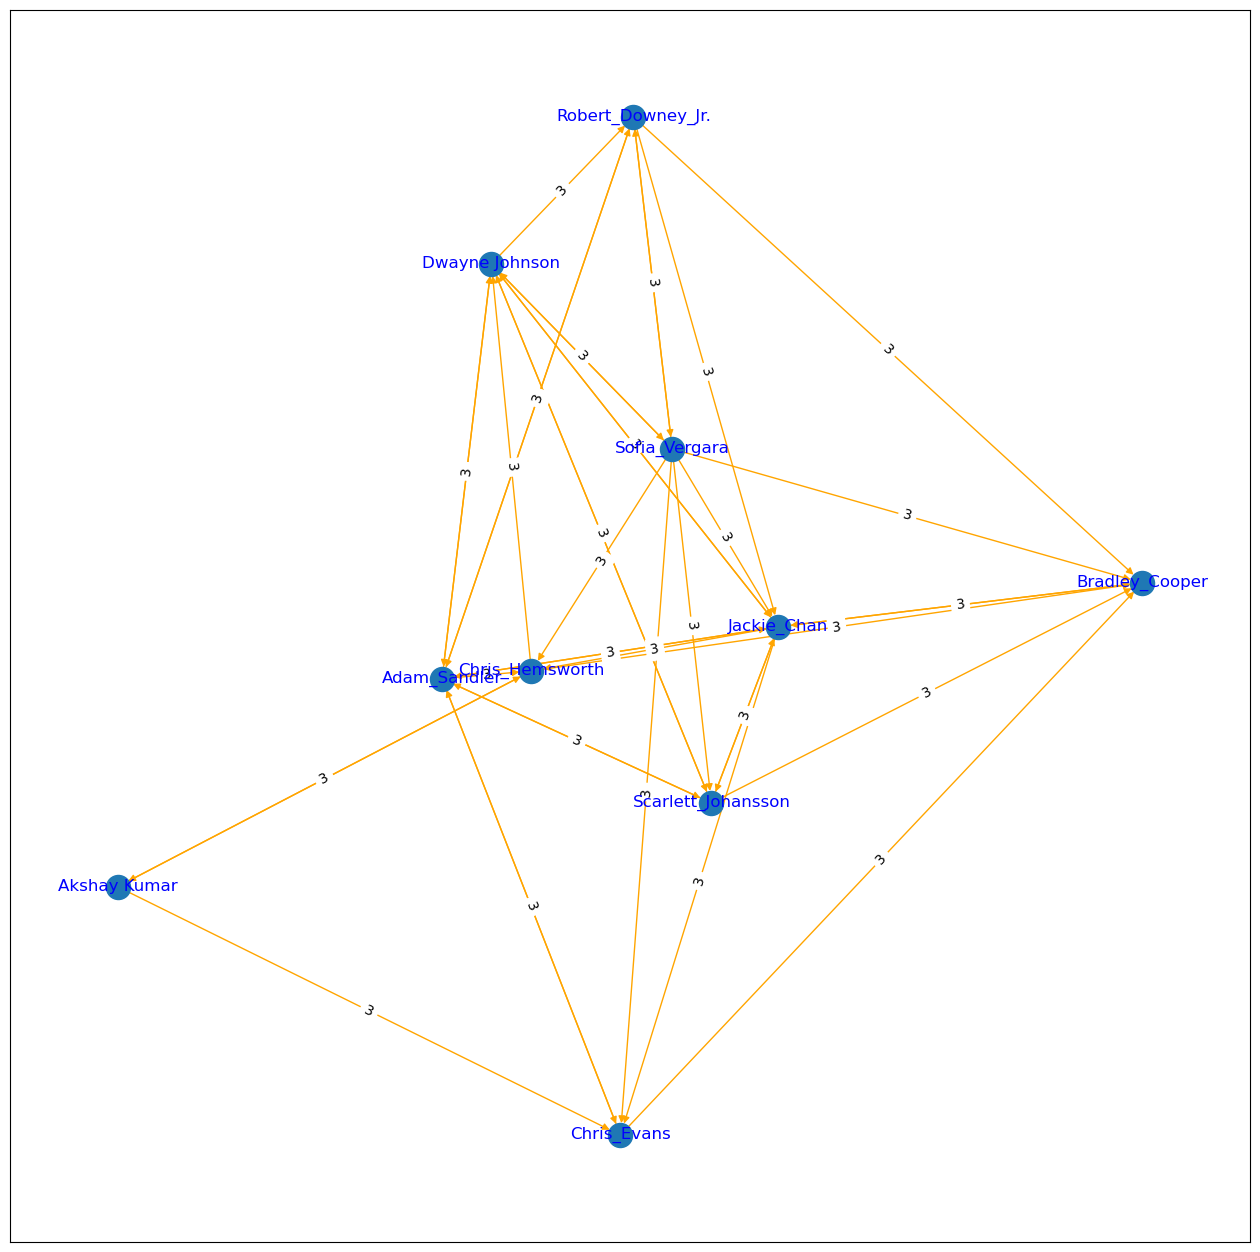

In [162]:
df_3 = df[df['Distance'] == 3]
G = nx.DiGraph()
for index, row in df_3.iterrows():
    G.add_edge(row['Actor_start_name'], row['Actor_finish_name'], weight = row['Distance'])
edges = G.edges(data=True)
colors = ['red' if data['weight'] == 1 else 'darkgreen' if data['weight'] == 2 else 'orange' for _, _, data in edges]
plt.figure(figsize=(16,16))
pos = nx.spring_layout(G)
lab = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, edge_color = colors, font_color='blue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=lab)
plt.show()

### Parsing movie descriptions and drawing related wordclouds

In [174]:
def get_movie_descriptions_by_actor_soup(actor_soup):
    
    descriptions = []
    movies = get_movies_by_actor_soup(actor_soup)
    headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
    for movie_name, movie_url in movies:
        movie_url = movie_url.replace('/fullcredits', '')
        response = requests.get(movie_url, headers=headers)
        soup = BeautifulSoup(response.text)
        description = soup.find('span', {'data-testid': 'plot-xl', 'role': 'presentation'})
        if description:
            descriptions.append(description.text.strip())
    return descriptions

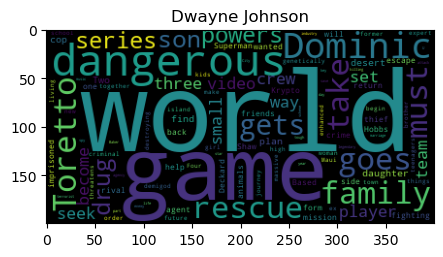

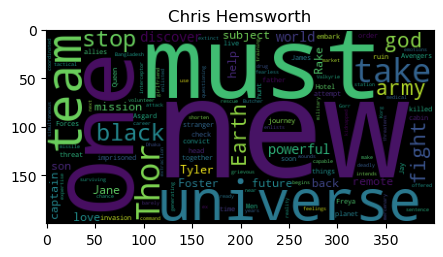

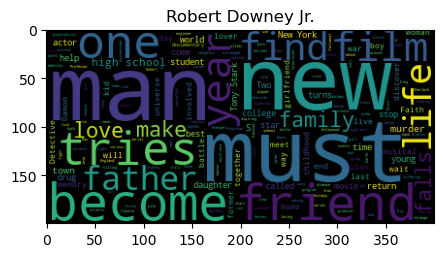

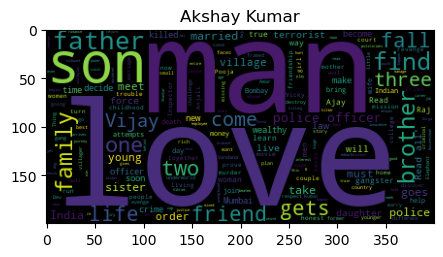

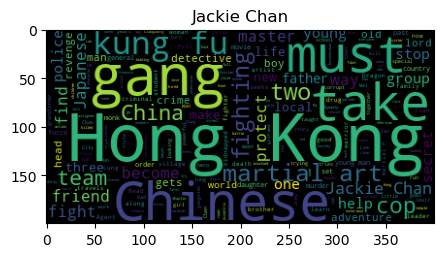

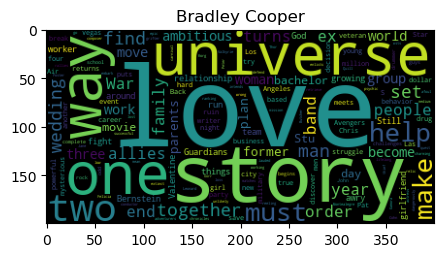

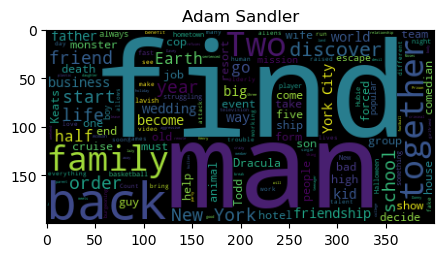

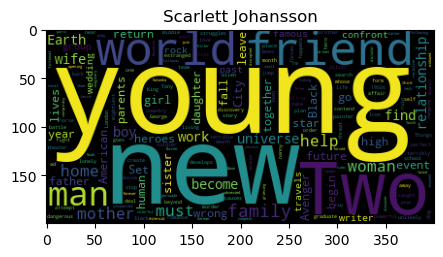

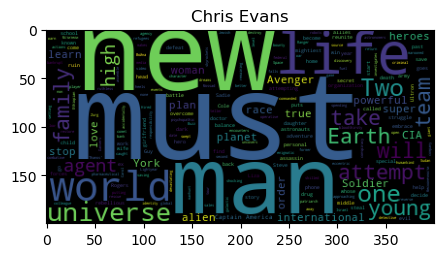

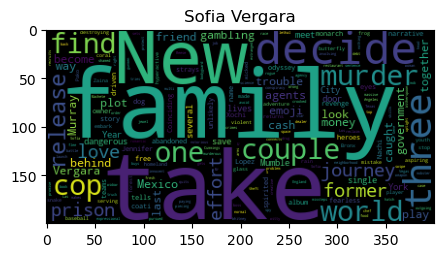

In [173]:
for elem in zipped_list:
    with open(f'./{elem[0]}_new.txt', 'r') as f:
        
        file = f.read()
        plt.figure(figsize=(5, 3))
        wordcloud = WordCloud(stopwords=STOPWORDS).generate(file)
        plt.imshow(wordcloud)
        plt.title(elem[0])
        plt.show()